1.1.1 Задание

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

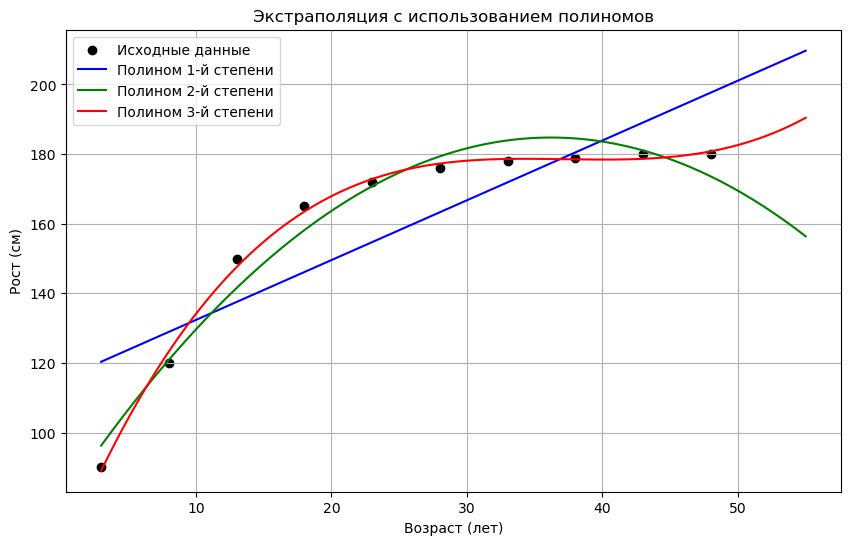

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Исходные данные: возраст и рост
age = np.array([3, 8, 13, 18, 23, 28, 33, 38, 43, 48])
height = np.array([90, 120, 150, 165, 172, 176, 178, 179, 180, 180])

p1 = Polynomial.fit(age, height, 1)
p2 = Polynomial.fit(age, height, 2)
p3 = Polynomial.fit(age, height, 3)

# Расширенный диапазон возрастов для построения графика
age_extended = np.linspace(3, 55, 200)  # Генерация 200 равномерных значений возраста от 3 до 55 лет

# Вычисление значений роста для каждого возраста в расширенном диапазоне с использованием полиномов
height_p1 = p1(age_extended)  # Вычисление роста по полиному первой степени
height_p2 = p2(age_extended)  # Вычисление роста по полиному второй степени
height_p3 = p3(age_extended)  # Вычисление роста по полиному третьей степени

plt.figure(figsize=(10, 6))
plt.scatter(age, height, color='black', label='Исходные данные')

plt.plot(age_extended, height_p1, label='Полином 1-й степени', color='blue')
plt.plot(age_extended, height_p2, label='Полином 2-й степени', color='green')
plt.plot(age_extended, height_p3, label='Полином 3-й степени', color='red')

plt.title('Экстраполяция с использованием полиномов')
plt.xlabel('Возраст (лет)')
plt.ylabel('Рост (см)')

plt.legend()
plt.grid()
plt.show()

Задание 2

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

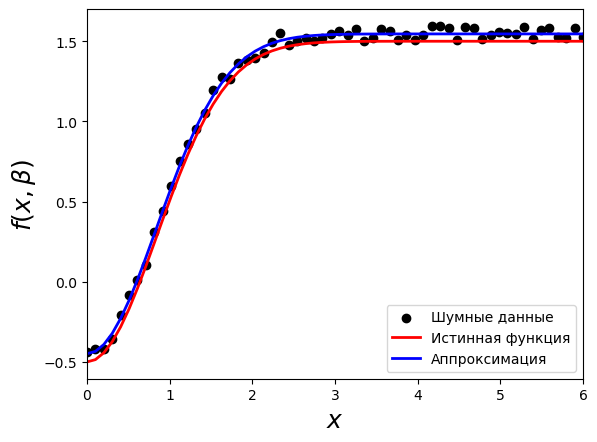

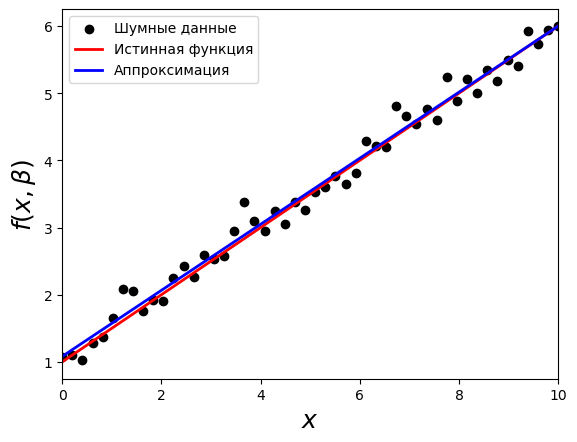

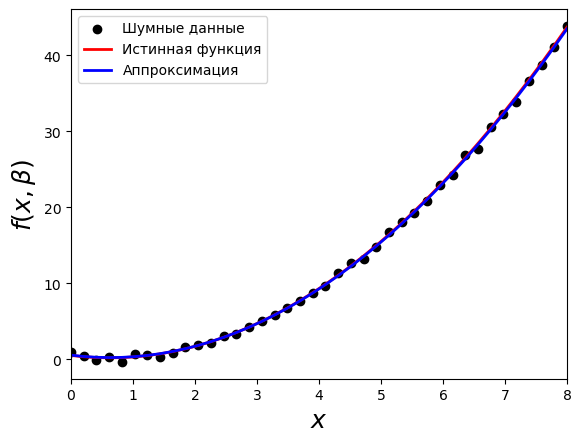

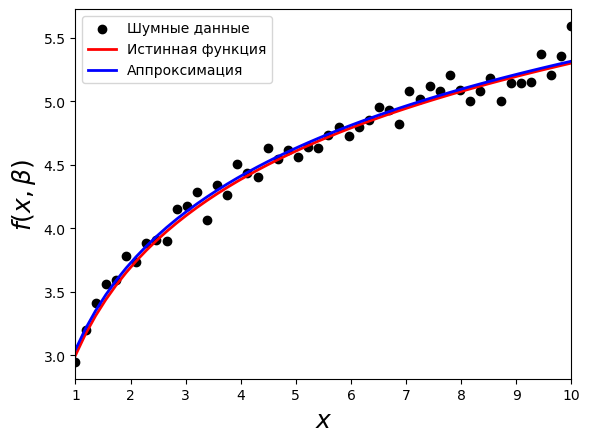

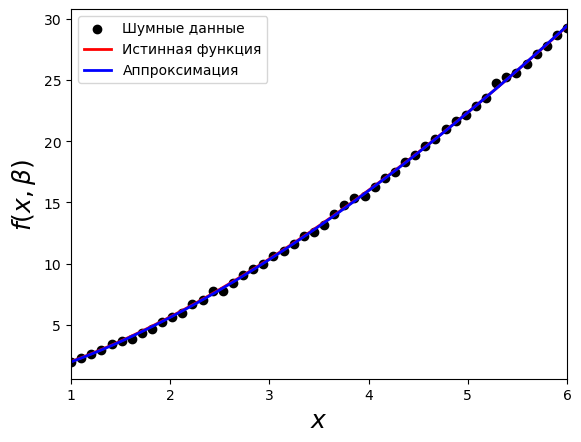

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Функция №0 (Экспоненциальная аппроксимация с квадратом)
beta = (1.5, -2.0, 0.7)  # Коэффициенты для истинной функции
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)  # Экспоненциальная функция с квадратичным аргументом

# Генерация данных
xdata = np.linspace(0, 6, 60)  # Диапазон для x от 0 до 6, 60 точек
y = f(xdata, *beta)  # Вычисление истинных значений y
ydata = y + 0.1 * np.random.rand(len(xdata))  # Добавление шума (случайные отклонения)

# Аппроксимация функции с помощью curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)  # Определяем оптимальные параметры
lin_dev = sum(beta_cov[0])  # Линейные отклонения
residuals = ydata - f(xdata, *beta_opt)  # Остатки (ошибки аппроксимации)
fres = sum(residuals**2)  # Сумма квадратов остатков

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Шумные данные', color='black')  # Шумные данные
ax.plot(xdata, y, 'r', lw=2, label='Истинная функция')  # Истинная функция
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')  # Аппроксимация
ax.set_xlim(0, 6)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.legend()
plt.show()

# Функция №1 (Линейная аппроксимация)
beta = (1.0, 0.5)  # Коэффициенты для линейной функции
def f(x, b0, b1):
    return b0 + b1 * x  # Линейная функция

# Генерация данных
xdata = np.linspace(0, 10, 50)  # Диапазон для x от 0 до 10, 50 точек
y = f(xdata, *beta)  # Истинные значения y
ydata = y + 0.2 * np.random.randn(len(xdata))  # Добавление шума (нормальное распределение)

# Аппроксимация
beta_opt, beta_cov = curve_fit(f, xdata, ydata)  # Определяем оптимальные параметры
line_dev = sum(beta_cov[0])  # Линейные отклонения
residuals = ydata - f(xdata, *beta_opt)  # Остатки
fres = sum(residuals**2)  # Сумма квадратов остатков

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Шумные данные', color='black')  # Шумные данные
ax.plot(xdata, y, 'r', lw=2, label='Истинная функция')  # Истинная линия
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')  # Аппроксимация
ax.set_xlim(0, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.legend()
plt.show()

# Функция №2 (Квадратичная аппроксимация)
beta = (0.5, -1.0, 0.8)  # Коэффициенты для квадратичной функции
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x**2  # Квадратичная функция

# Генерация данных
xdata = np.linspace(0, 8, 40)  # Диапазон для x от 0 до 8, 40 точек
y = f(xdata, *beta)  # Истинные значения y
ydata = y + 0.3 * np.random.randn(len(xdata))  # Добавление шума

# Аппроксимация
beta_opt, beta_cov = curve_fit(f, xdata, ydata)  # Определяем оптимальные параметры
lin_dev = sum(beta_cov[0])  # Линейные отклонения
residuals = ydata - f(xdata, *beta_opt)  # Остатки
fres = sum(residuals**2)  # Сумма квадратов остатков

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Шумные данные', color='black')  # Шумные данные
ax.plot(xdata, y, 'r', lw=2, label='Истинная функция')  # Истинная функция
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')  # Аппроксимация
ax.set_xlim(0, 8)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.legend()
plt.show()

# Функция №3 (Логарифмическая аппроксимация)
beta = (3, 1)  # Коэффициенты для логарифмической функции
def f(x, b0, b1):
    return b0 + b1 * np.log(x)  # Логарифмическая функция

# Генерация данных
xdata = np.linspace(1, 10, 50)  # Диапазон для x от 1 до 10, 50 точек
y = f(xdata, *beta)  # Истинные значения y
ydata = y + 0.1 * np.random.randn(len(xdata))  # Добавление шума

# Аппроксимация
beta_opt, beta_cov = curve_fit(f, xdata, ydata)  # Определяем оптимальные параметры
lin_dev = sum(beta_cov[0])  # Линейные отклонения
residuals = ydata - f(xdata, *beta_opt)  # Остатки
fres = sum(residuals**2)  # Сумма квадратов остатков

# Построение графика
fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Шумные данные', color='black')  # Шумные данные
ax.plot(xdata, y, 'r', lw=2, label='Истинная функция')  # Истинная функция
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')  # Аппроксимация
ax.set_xlim(1, 10)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.legend()
plt.show()

# Функция №4 (Степенная аппроксимация)
beta = (2, 1.5)  # Коэффициенты для степенной функции
def f(x, b0, b1):
    return b0 * x**b1  # Степенная функция

# Генерация данных
xdata = np.linspace(1, 6, 50)  # Диапазон для x от 1 до 6, 50 точек
y = f(xdata, *beta)  # Истинные значения y
ydata = y + 0.15 * np.random.randn(len(xdata))  # Добавление шума

# Аппроксимация
beta_opt, beta_cov = curve_fit(f, xdata, ydata)  # Определяем оптимальные параметры
lin_dev = sum(beta_cov[0])  # Линейные отклонения
residuals = ydata - f(xdata, *beta_opt)  # Остатки
fres = sum(residuals**2)  # Сумма квадратов остатков

fig, ax = plt.subplots()
ax.scatter(xdata, ydata, label='Шумные данные', color='black')
ax.plot(xdata, y, 'r', lw=2, label='Истинная функция')
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2, label='Аппроксимация')
ax.set_xlim(1, 6)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.legend()
plt.show()

3 Задание

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0
       YearsExperience         Salary
count        30.000000      30.000000
mean          5.313333   76003.000000
std           2.837888   27414.429785
min           1.100000   37731.000000
25%           3.200000   56720.750000
50%           4.700000   65237.000000
75%           7.700000  100544.750000
max          10.500000  122391.000000


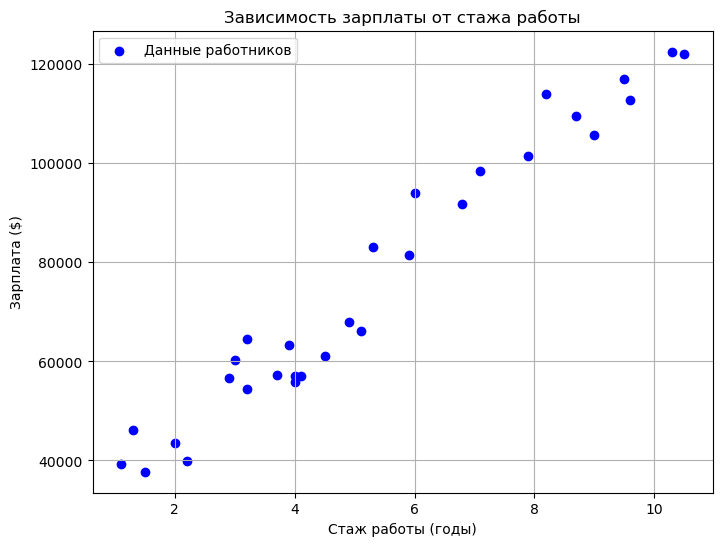

Свободный член (intercept): 25321.58301177679
Коэффициент (slope): 9423.81532303098
     Actual      Predicted
0  112635.0  115790.210113
1   67938.0   71498.278095
2  113812.0  102596.868661
3   83088.0   75267.804224
4   64445.0   55477.792045
5   57189.0   60189.699707


<Figure size 800x600 with 0 Axes>

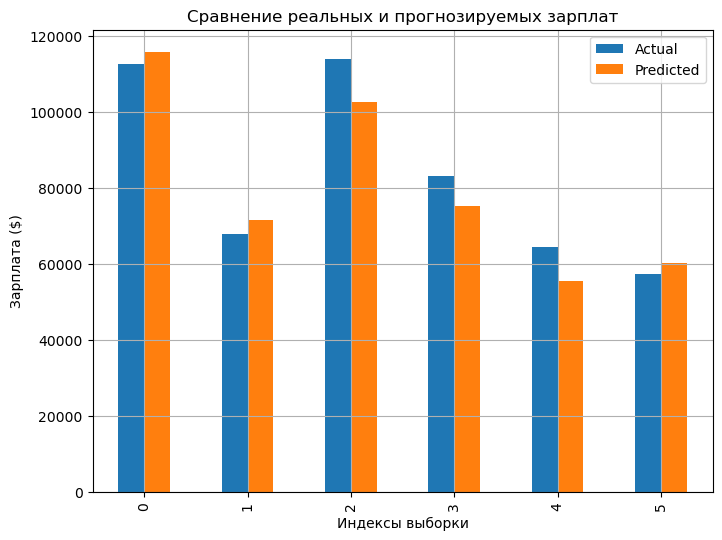

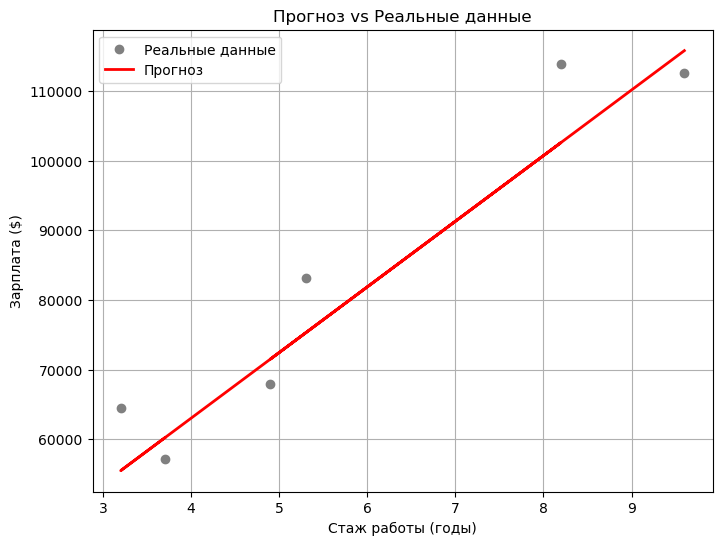

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression 

url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
dataset = pd.read_csv(url)

# Выводим первые 5 строк для ознакомления с данными
print(dataset.head())

# Описание данных: минимальные и максимальные значения, среднее, стандартное отклонение
print(dataset.describe())

# Визуализация данных: построение графика зависимости зарплаты от стажа работы
plt.figure(figsize=(8, 6))  
plt.scatter(dataset['YearsExperience'], dataset['Salary'], color='blue', label="Данные работников")  # Точечный график
plt.title("Зависимость зарплаты от стажа работы")  
plt.xlabel("Стаж работы (годы)")  
plt.ylabel("Зарплата ($)")  
plt.legend()  
plt.grid()  
plt.show()

# Разделение данных на входные (X) и выходные (y) переменные
X = dataset.iloc[:, :-1].values  # Стаж работы (независимая переменная)
y = dataset.iloc[:, 1].values  # Зарплата (зависимая переменная)

# Разделение данных на обучающую и тестовую выборки (80% на обучение, 20% на тестирование)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии и обучение на тренировочных данных
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Вывод коэффициентов линейной регрессии
print(f"Свободный член (intercept): {regressor.intercept_}")  # Свободный член
print(f"Коэффициент (slope): {regressor.coef_[0]}")  # Коэффициент наклона прямой

# Предсказание зарплаты для тестовой выборки
y_pred = regressor.predict(X_test)

# Сравнение реальных и прогнозируемых значений
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

# Визуализация сравнения реальных и прогнозируемых значений в виде столбчатой диаграммы
plt.figure(figsize=(8, 6))  
df.plot(kind='bar', figsize=(8, 6))  # Столбчатая диаграмма
plt.title("Сравнение реальных и прогнозируемых зарплат")  
plt.xlabel("Индексы выборки")  
plt.ylabel("Зарплата ($)")  
plt.grid() 
plt.show()

# Построение графика реальных и прогнозируемых данных для тестовой выборки
plt.figure(figsize=(8, 6))  
plt.scatter(X_test, y_test, color='gray', label="Реальные данные")  # Точки для реальных данных
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Прогноз")  # Линия для прогнозов
plt.title("Прогноз vs Реальные данные")  
plt.xlabel("Стаж работы (годы)")  
plt.ylabel("Зарплата ($)")  
plt.legend()  
plt.grid()  
plt.show()

4 Задание

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

Первые строки датасета:
   Petrol_tax  Average_income  Paved_Highways  Population_Driver_licence(%)  \
0         9.0            3571            1976                         0.525   
1         9.0            4092            1250                         0.572   
2         9.0            3865            1586                         0.580   
3         7.5            4870            2351                         0.529   
4         8.0            4399             431                         0.544   

   Petrol_Consumption  
0                 541  
1                 524  
2                 561  
3                 414  
4                 410   

Размер датасета: (48, 5) 

Описание данных:
       Petrol_tax  Average_income  Paved_Highways  \
count   48.000000       48.000000       48.000000   
mean     7.668333     4241.833333     5565.416667   
std      0.950770      573.623768     3491.507166   
min      5.000000     3063.000000      431.000000   
25%      7.000000     3739.000000     3110.250

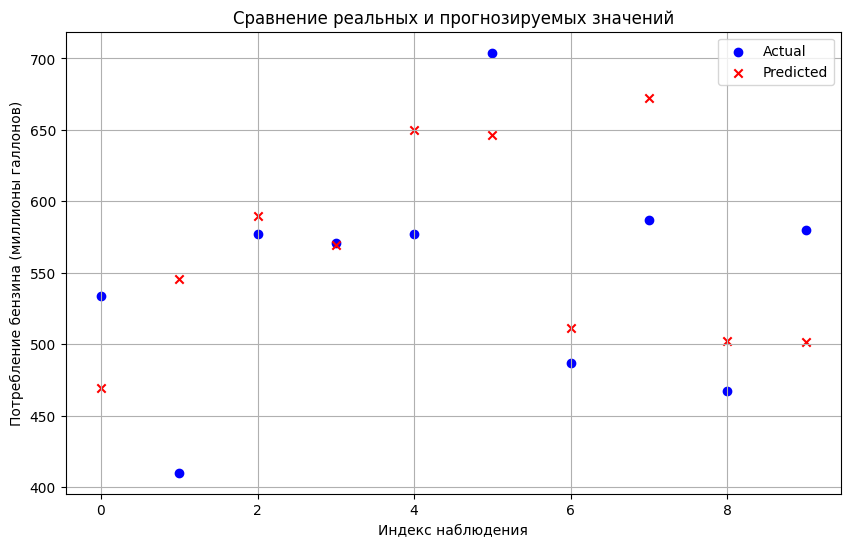

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

url = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'

dataset = pd.read_csv(url)

print("Первые строки датасета:")
print(dataset.head(), '\n')

print("Размер датасета:", dataset.shape, '\n')

print("Описание данных:")
print(dataset.describe(), '\n')

# Разделяем данные на признаки (X) и целевую переменную (y)
X = dataset.iloc[:, :-1]  # Все столбцы, кроме последнего
y = dataset.iloc[:, -1]   # Последний столбец (целевой)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Создаем модель линейной регрессии
regressor = LinearRegression()

# Обучаем модель на обучающей выборке
regressor.fit(X_train, y_train)

# Создаем DataFrame для коэффициентов регрессии
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

print("Коэффициенты множественной регрессии:")
print(coeff_df, '\n')

y_pred = regressor.predict(X_test)

# Создаем DataFrame для сравнения реальных и предсказанных значений
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print("Сравнение реальных и предсказанных значений:")
print(comparison_df, '\n')

# Выводим метрики качества модели
print('Среднеквадратичная ошибка (Mean Squared Error):', metrics.mean_squared_error(y_test, y_pred))
print('Средняя абсолютная ошибка (Mean Absolute Error):', metrics.mean_absolute_error(y_test, y_pred))
print('R^2 (коэффициент детерминации):', metrics.r2_score(y_test, y_pred))

# Строим график для сравнения реальных и предсказанных значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')  # Реальные значения
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', marker='x')  # Предсказания
plt.title('Сравнение реальных и прогнозируемых значений')  
plt.xlabel('Индекс наблюдения') 
plt.ylabel('Потребление бензина (миллионы галлонов)') 
plt.legend() 
plt.grid() 
plt.show()


5 Задание

Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.
Вариант 2

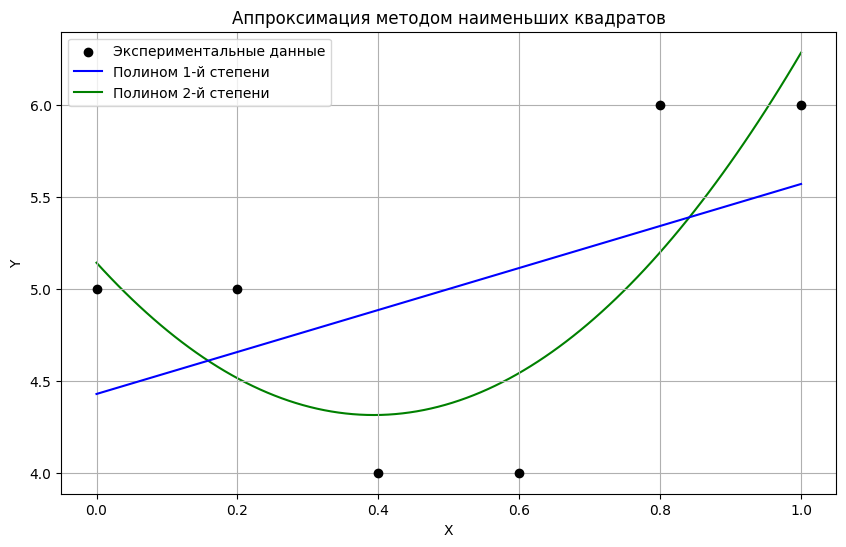

Коэффициенты полинома 1-й степени:
y = 1.1429 * x + 4.4286

Коэффициенты полинома 2-й степени:
y = 5.3571 * x^2 + -4.2143 * x + 5.1429



In [14]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([5.0, 5.0, 4.0, 4.0, 6.0, 6.0])

# Находим коэффициенты полинома 1-й степени (линейная аппроксимация)
coeffs_1 = np.polyfit(x, y, 1)  # Функция polyfit ищет полином степени 1, который лучше всего подходит к данным
poly_1 = np.poly1d(coeffs_1)    

# Находим коэффициенты полинома 2-й степени (квадратичная аппроксимация)
coeffs_2 = np.polyfit(x, y, 2)  # Функция polyfit ищет полином степени 2
poly_2 = np.poly1d(coeffs_2)    

x_plot = np.linspace(0, 1, 100)  # Генерируем 100 равномерно распределенных точек в диапазоне [0, 1]

# Вычисляем значения полиномов для точек x_plot
y_poly_1 = poly_1(x_plot)  
y_poly_2 = poly_2(x_plot) 

plt.figure(figsize=(10, 6)) 

# Отображаем экспериментальные данные в виде черных точек
plt.scatter(x, y, color='black', label='Экспериментальные данные', zorder=3)

# Рисуем график полинома 1-й степени (линейная аппроксимация)
plt.plot(x_plot, y_poly_1, label='Полином 1-й степени', color='blue', zorder=2)

# Рисуем график полинома 2-й степени (квадратичная аппроксимация)
plt.plot(x_plot, y_poly_2, label='Полином 2-й степени', color='green', zorder=1)

plt.title('Аппроксимация методом наименьших квадратов') 
plt.xlabel('X') 
plt.ylabel('Y')

plt.legend() 
plt.grid()  

plt.show()

print("Коэффициенты полинома 1-й степени:")
print(f"y = {coeffs_1[0]:.4f} * x + {coeffs_1[1]:.4f}\n")

print("Коэффициенты полинома 2-й степени:")
print(f"y = {coeffs_2[0]:.4f} * x^2 + {coeffs_2[1]:.4f} * x + {coeffs_2[2]:.4f}\n")
